# Numpy arrays

NumPy의 핵심 자료 구조는 array (ndarray)입니다. NumPy의 array는 Python의 list와 비슷하지만 다릅니다. NumPy array는 다음과 같은 특징이 있습니다.

- homogenous data type
- vectorized operations
- optimization using C

직접적으로 느낄 수 있는 가장 큰 차이는 속도입니다. 파이썬 리스트와 NumPy array에서 동일한 연산의 속도 비교를 해보겠습니다.

In [240]:
a = [i ** 2 for i in range(10000)]
b = [i ** 3 for i in range(10000)]

In [241]:
%%timeit
c = [a + b for i, j in zip(a,b)]

1.36 s ± 64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
import numpy as np

np.arange 함수는 python의 range처럼 0부터 n-1까지의 숫자를 numpy array로 만들어줍니다. 또한 numpy array에서 제곱이나 세제곱 같은 operation은 모든 element에 적용됩니다.

In [242]:
a = np.arange(10000) ** 2
b = np.arange(10000) ** 3

In [243]:
%%timeit
c = a + b

4.61 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


이처럼 NumPy array는 파이썬 리스트보다 10배 이상 빠릅니다. 이 차이는 데이터가 커질 수록 더 현격해집니다.

# NumPy Basics

array 만들기 (리스트에서)

In [310]:
d = np.array([[1,2,3], 
              [4,5,6]])

array의 shape. 첫번째 dimension의 length는 2이며, 두번째 dimension의 length는 3입니다.

In [311]:
d.shape

(2, 3)

dimension의 개수 보기

In [324]:
d.ndim

2

array안에 element가 몇개인지 보기

In [323]:
d.size

6

Indexing

In [312]:
d[0]

array([1, 2, 3])

In [313]:
d[0, 0]

1

In [314]:
d[1, 1]

5

data type

In [315]:
d.dtype

dtype('int64')

# Array Creation

In [251]:
np.zeros( (3,4) )

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [252]:
np.ones( (3,4) )

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

Identity matrix 생성

In [259]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

data type 지정 가능

In [253]:
np.ones( (3,4) , dtype=int)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

arange로 생성할 때 처음과 끝, step을 지정할 수 있습니다. python range와 마찬가지로 끝은 포함하지 않습니다.

In [254]:
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

linspace는 처음과 끝 사이에 동일한 간격으로 num 만큼 element를 만듭니다.

In [255]:
np.linspace( 0, 2, 9 ) 

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

랜덤으로도 생성 가능합니다. rand는 uniform, randn은 normal distribution에서 랜덤으로 추출합니다.

In [256]:
np.random.rand(3, 4)

array([[ 0.91544515,  0.14591723,  0.29288526,  0.05144634],
       [ 0.9602723 ,  0.39403972,  0.1355208 ,  0.42587075],
       [ 0.91979894,  0.27637501,  0.57434758,  0.00611701]])

In [257]:
np.random.randn(3,4)

array([[-0.91795895,  0.54632589,  0.85919866,  0.59713789],
       [-0.91719378,  0.64899106,  0.40184436,  0.25309338],
       [-1.50955762, -0.16817314, -0.50825671,  0.371381  ]])

## Data type objects

In [260]:
d

array([[1, 2],
       [3, 4]])

NumPy array에는 data type이 지정되어 있습니다. (homogenous)

In [262]:
d.dtype

dtype('int64')

In [264]:
d.dtype.type

numpy.int64

data type의 한 element의 사이즈 (bytes)를 확인할 수 있습니다. int64 타입의 사이즈는 64/8 = 8 bytes입니다.

In [266]:
d.dtype.itemsize

8

In [267]:
d.itemsize

8

numpy array가 차지하는 byte의 수도 볼 수 있습니다.

In [507]:
d.nbytes

48

이는 element의 개수 * element 하나의 byte 크기와 같습니다.

In [508]:
d.size * d.itemsize

48

NumPy에 존재하는 type과 그 설명은 다음과 같습니다.

- bool : This stores boolean (True or False) as a bit
- inti : This is a platform integer (normally either int32 or int64)
- int8 : This is an integer ranging from-128 to 127
- int16 : This is an integer ranging from -32768 to 32767
- int32 : This is an integer ranging from -2 \*\* 31 to 2 ** 31 -1
- int64 : This is an integer ranging from -2 \*\* 63 to 2 ** 63 -1
- uint8 : This is an unsigned integer ranging from 0 to 255
- uint16 : This is an unsigned integer ranging from 0 to 65535
- uint32 : This is an unsigned integer ranging from 0 to 2 ** 32 - 1
- uint64 : This is an unsigned integer ranging from 0 to 2 ** 64 - 1
- float16 : This is a half precision float with sign bit, 5 bits - exponent, and 10 bits mantissa
- float32 : This is a single precision float with sign bit, 8 bits exponent, and 23 bits mantissa
- float64 or float : This is a double precision float with sign bit, 11 bits exponent, and 52 bits mantissa
- complex64 : This is a complex number represented by two 32-bit floats (real and imaginary components)
- complex128 or complex : This is a complex number represented by two 64-bit floats (real and imaginary components)

# 1D Slicing and indexing

파이썬 리스트와 마찬가지로 slicing과 indexing을 할 수 있습니다.

In [270]:
e = np.arange(9)
e

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [274]:
e[3:7]

array([3, 4, 5, 6])

In [275]:
e[:7:2]

array([0, 2, 4, 6])

In [276]:
e[::-1]

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

# Chaging shapes

## Flattening

In [296]:
f = np.random.randn(6, 2)

In [297]:
f

array([[ 1.58162314,  1.29285856],
       [-0.50208407, -1.01823689],
       [ 2.88787641,  1.88591386],
       [-0.48808354,  0.13893885],
       [ 0.48319582, -1.23552285],
       [ 0.22636333,  2.10310731]])

In [298]:
f.ravel()

array([ 1.58162314,  1.29285856, -0.50208407, -1.01823689,  2.88787641,
        1.88591386, -0.48808354,  0.13893885,  0.48319582, -1.23552285,
        0.22636333,  2.10310731])

In [299]:
f.flatten()

array([ 1.58162314,  1.29285856, -0.50208407, -1.01823689,  2.88787641,
        1.88591386, -0.48808354,  0.13893885,  0.48319582, -1.23552285,
        0.22636333,  2.10310731])

ravel()과 flatten()은 기능은 동일하지만, flatten()은 항상 새 메모리를 할당하고, ravel()은 데이터의 위치는 바꾸지 않고 array의 view만을 생성할 수 있다는 차이가 있습니다.

In [300]:
f.transpose()

array([[ 1.58162314, -0.50208407,  2.88787641, -0.48808354,  0.48319582,
         0.22636333],
       [ 1.29285856, -1.01823689,  1.88591386,  0.13893885, -1.23552285,
         2.10310731]])

In [301]:
f.transpose().shape

(2, 6)

reshape으로 shape을 바꿀 수 있습니다.

In [302]:
f.reshape(3,4)

array([[ 1.58162314,  1.29285856, -0.50208407, -1.01823689],
       [ 2.88787641,  1.88591386, -0.48808354,  0.13893885],
       [ 0.48319582, -1.23552285,  0.22636333,  2.10310731]])

# Stacking & Splitting

In [305]:
g = np.arange(9).reshape(3,3)
g

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [306]:
h = 2 * g
h

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

np.stack은 디폴트로 가장 첫번째 axis에 여러 array을 쌓습니다.

In [308]:
np.stack([g, h])

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]]])

In [316]:
np.stack([g, h]).shape

(2, 3, 3)

Stacking하는 axis를 지정할 수 있습니다.

In [318]:
np.stack([g, h], axis=1)

array([[[ 0,  1,  2],
        [ 0,  2,  4]],

       [[ 3,  4,  5],
        [ 6,  8, 10]],

       [[ 6,  7,  8],
        [12, 14, 16]]])

In [319]:
np.stack([g, h], axis=1).shape

(3, 2, 3)

NumPy array를 split할 수도 있습니다.

In [320]:
np.split(g, 3)

[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]

split하는 axis 역시 지정 가능합니다.

In [321]:
np.split(g, 3, axis=1)

[array([[0],
        [3],
        [6]]), array([[1],
        [4],
        [7]]), array([[2],
        [5],
        [8]])]

# Converting arrays

In [325]:
g

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

파이썬 리스트로 바꾸기

In [326]:
g.tolist()

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

array의 data type을 바구기

In [328]:
g.astype(float)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [329]:
g.astype(float).dtype

dtype('float64')

## Basic Operations

In [368]:
np.random.seed(1)

In [369]:
i = np.random.randint(0, 15, size=(4,4))
i

array([[ 5, 11, 12,  8],
       [ 9, 11,  5,  0],
       [ 0,  1, 12,  7],
       [13, 12,  6,  9]])

전체 element들의 평균을 구하기

In [370]:
i.mean()

7.5625

axis=0을 기준으로 평균 구하기

In [371]:
i.mean(axis=0)

array([ 6.75,  8.75,  8.75,  6.  ])

axis=1을 기준으로 평균 구하기

In [372]:
i.mean(axis=1)

array([  9.  ,   6.25,   5.  ,  10.  ])

In [373]:
i.sum(axis=0)

array([27, 35, 35, 24])

최댓값을 갖는 위치를 찾는 함수

In [374]:
i.argmax(axis=0)

array([3, 3, 0, 3])

최솟값을 갖는 위치를 찾는 함수

In [375]:
i.argmin(axis=0)

array([2, 2, 1, 1])

cumulative sum

In [379]:
i.cumsum(axis=1)

array([[ 5, 16, 28, 36],
       [ 9, 20, 25, 25],
       [ 0,  1, 13, 20],
       [13, 25, 31, 40]])

In [376]:
i_bool = i > 0
i_bool

array([[ True,  True,  True,  True],
       [ True,  True,  True, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [377]:
i_bool.all(axis=0)

array([False,  True,  True, False], dtype=bool)

In [378]:
i_bool.any(axis=0)

array([ True,  True,  True,  True], dtype=bool)

In [385]:
k = np.array([[1,1],
             [0,1]])
k

array([[1, 1],
       [0, 1]])

In [386]:
l = np.array([[2,0],
             [3,4]])
l

array([[2, 0],
       [3, 4]])

In [387]:
k*l

array([[2, 0],
       [0, 4]])

In [388]:
k.dot(l)

array([[5, 4],
       [3, 4]])

In [389]:
np.dot(k, l)

array([[5, 4],
       [3, 4]])

Python 3.5부터 matrix multiplication을 위한 @ operation이 추가되었습니다.

In [391]:
k@l

array([[5, 4],
       [3, 4]])

# Broadcasting

Numpy는 두 array의 shape가 정확히 일치하지 않아도 최대한 operation을 수행하려고 합니다. 이를 broadcasting이라고 합니다.  
가장 간단한 예는 scalar 곱입니다. array에 scalar를 곱하면 그 scalar 값으로 채워져 있는 같은 shape의 array를 곱해주는 것과 같은 효과가 납니다.

In [392]:
np.array([1,2,3]) * 2

array([2, 4, 6])

In [393]:
np.array([1,2,3]) * np.array([2,2,2])

array([2, 4, 6])

array들의 dimension의 개수가 다를 때, numpy의 broadcasting은 더 작은 array의 shape의 앞에 길이가 1인 dimension을 필요한 만큼 반복해서 붙입니다.

그 뒤 1의 길이를 갖는 dimension은 다른 array의 dimension과 같은 길이를 가진 것처럼 행동합니다. 즉, dimension의 길이만큼 같은 값이 반복되는 것입니다.

In [397]:
m = np.array([[1,2], [3,4]])
m.shape

(2, 2)

In [399]:
m

array([[1, 2],
       [3, 4]])

In [396]:
n = np.array([1, 2])
n.shape

(2,)

In [400]:
n

array([1, 2])

In [398]:
m + n

array([[2, 4],
       [4, 6]])

## Fancy indexing

Fancy indexing은 NumPy array를 좀 더 유연하게 indexing할 수 있는 방법입니다. 인덱싱 자리에 scalar 값이 아닌 리스트 혹은 array를 넣을 수 있습니다.

In [403]:
np.random.seed(1)
o = np.random.randint(100, size=10)
o

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [409]:
np.array([o[1], o[6], o[2]])

array([12, 79, 72])

In [411]:
fancy_index = [1, 6, 2]
o[fancy_index]

array([12, 79, 72])

In [412]:
fancy_index = np.array([[3, 7],
                [4, 5]])
o[fancy_index]

array([[ 9, 64],
       [75,  5]])

In [414]:
p = np.arange(12).reshape((3, 4))
p

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

[0,1,2]와 [2,1,3]으로 indexing하면 (0,2), (1,1), (2,3)을 가져옵니다.

In [417]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
p[row, col]

array([ 2,  5, 11])

In [419]:
x = np.random.rand(100)

In [420]:
y = 1.2 * x + np.random.randn(100)/10

In [443]:
%matplotlib inline

from matplotlib import pyplot as plt

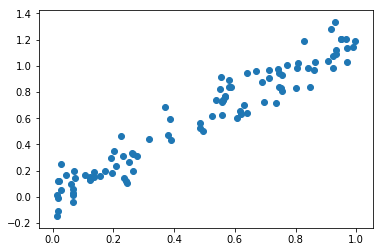

In [423]:
plt.scatter(x, y);

In [509]:
xy = np.stack([x, y], axis=1)
xy

array([[ 0.01582124,  0.12286795],
       [ 0.92943723,  1.33402265],
       [ 0.69089692,  0.87321275],
       [ 0.99732285,  1.1867719 ],
       [ 0.17234051,  0.19316414],
       [ 0.13713575,  0.15265748],
       [ 0.93259546,  1.1208555 ],
       [ 0.69681816,  0.72397992],
       [ 0.06600017,  0.02749076],
       [ 0.75546305,  0.80685298],
       [ 0.75387619,  0.92953134],
       [ 0.92302454,  1.07796533],
       [ 0.71152476,  0.90335084],
       [ 0.12427096,  0.13165484],
       [ 0.01988013,  0.12248968],
       [ 0.02621099,  0.05280657],
       [ 0.02830649,  0.25303776],
       [ 0.24621107,  0.10581719],
       [ 0.86002795,  0.96734187],
       [ 0.53883106,  0.73674597],
       [ 0.55282198,  0.91621895],
       [ 0.84203089,  0.98557359],
       [ 0.12417332,  0.15337488],
       [ 0.27918368,  0.31238899],
       [ 0.58575927,  0.83605684],
       [ 0.96959575,  1.13478411],
       [ 0.56103022,  0.74124325],
       [ 0.01864729, -0.00960341],
       [ 0.80063267,

In [430]:
indices = np.random.choice(xy.shape[0], 20, replace=False)
indices

array([94,  1, 66, 69, 20, 99, 54, 57, 84, 55, 56, 11, 64, 45, 71, 68, 86,
       26, 70, 78])

In [431]:
selection = xy[indices]  # fancy indexing here
selection.shape

(20, 2)

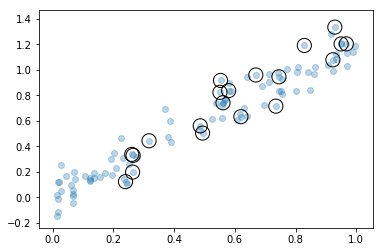

In [442]:
plt.scatter(xy[:, 0], xy[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolors='black', s=200);

## Boolean indexing

True 혹은 False 로도 indexing을 할 수 있습니다.

In [457]:
q = np.array([[1,2], [3,4]])
q

array([[1, 2],
       [3, 4]])

In [458]:
q[[True, False]]

array([[1, 2]])

In [459]:
q[[True, False], [True, False]]

array([1])

In [460]:
q[[True, True], [False, True]]

array([2, 4])

In [464]:
q[q > 1]

array([2, 3, 4])

## Linear Algebra

numpy에는 다양한 선형대수 관련 함수들이 들어 있습니다. 다음은 NumPy array에서 inverse matrix를 구하는 함수입니다.

In [503]:
q

array([[1, 2],
       [3, 4]])

In [468]:
np.linalg.inv(q)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

NumPy로 연립방정식도 풀 수 있습니다.

In [504]:
q

array([[1, 2],
       [3, 4]])

In [475]:
s = np.array([[5.], [7.]])
s

array([[ 5.],
       [ 7.]])

$$ 1x + 2y = 5 $$
$$ 3x + 4y = 7 $$

In [476]:
np.linalg.solve(q, s)

array([[-3.],
       [ 4.]])

# Applying to images

이미지는 NumPy array로 나타낼 수 있습니다.  
예시 이미지 하나의 대각선 방향을 검은색으로 바꿔보겠습니다.

In [489]:
from skimage.data import camera

In [490]:
image = camera()

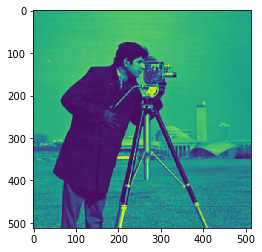

In [491]:
plt.imshow(image);

이미지의 shape는 512 X 512입니다.

In [492]:
image.shape

(512, 512)

대각선을 선택하기 위해 fancy indexing을 사용해 봅시다.

In [493]:
image[range(512), range(512)]

array([156, 157, 156, 154, 157, 156, 155, 157, 158, 157, 157, 155, 153,
       153, 157, 161, 160, 161, 161, 160, 161, 160, 158, 156, 156, 160,
       160, 160, 161, 163, 162, 162, 162, 160, 160, 161, 159, 159, 162,
       161, 161, 162, 161, 162, 164, 162, 160, 160, 159, 158, 158, 159,
       163, 165, 164, 163, 165, 164, 162, 161, 163, 163, 164, 166, 168,
       169, 169, 172, 173, 171, 169, 169, 169, 167, 171, 170, 169, 171,
       171, 171, 170, 171, 176, 177, 174, 174, 173, 171, 173, 174, 175,
       166, 166, 173, 175, 177, 176, 174, 174, 172, 173, 177, 179, 179,
       179, 178, 178, 177, 176, 176, 178, 178, 177, 178, 179, 181, 181,
       181, 182, 181, 179, 178, 178, 179, 180, 178, 178, 180, 182, 182,
       182, 182, 182, 189, 179,  95,  19,  11,  13,  15,  14,  13,  14,
        14,  13,  14,  14,  16,  16,  15,  16,  16,  14,  14,  13,  14,
        16,  16,  15,  13,  13,  14,  14,  12,  13,  13,  12,  13,  14,
        15,  15,  15,  16,  15,  14,  13,  14,  13,  11,  11,  1

대각선의 값을 0으로 바꿉니다.

In [494]:
image[range(512), range(512)] = 0

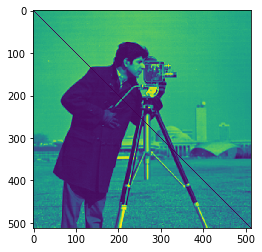

In [495]:
plt.imshow(image);

반대편 대각선도 선택해 봅니다.  
range의 step size를 -1로 두면 작아지는 리스트를 만들 수 있습니다.

In [496]:
image[range(512-1, -1, -1), range(512)] = 0

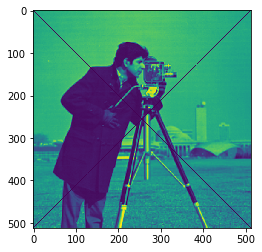

In [497]:
plt.imshow(image);

일정 크기 이상의 밝기는 모두 0으로 바꾸어봅시다. 이미지 밝기의 maximum 값의 1/4보다 큰 값은 모두 0으로 바꾸겠습니다.

In [498]:
image.max()

255

In [499]:
image > image.max() / 4

array([[False,  True,  True, ...,  True,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       [ True,  True, False, ..., False,  True,  True],
       ..., 
       [ True,  True, False, ..., False,  True,  True],
       [ True, False,  True, ...,  True, False,  True],
       [False,  True,  True, ...,  True,  True, False]], dtype=bool)

In [500]:
image[image > image.max() / 4] = 0

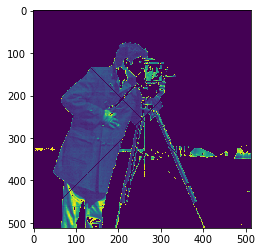

In [501]:
plt.imshow(image);

## Audio

NumPy array로 오디오도 표현 가능합니다.  
NumPy array의 값을 변형하는 것으로 오디오의 특성도 바꿀 수 있습니다.

먼저 오디오 하나를 인터넷에서 다운받습니다.

In [113]:
from urllib.request import urlopen

In [212]:
response = urlopen('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')

In [213]:
print(response.info())

Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:38 GMT
Accept-Ranges: bytes
ETag: "ac20ba9445b6cf1:0"
Server: Microsoft-IIS/7.5
X-Powered-By: ASP.NET
Date: Sun, 28 Jan 2018 01:05:38 GMT
Connection: close
Content-Length: 43642




파일로 저장하고 읽어옵니다.

In [214]:
with open('wave.wav', 'wb') as w:
    w.write(response.read())

In [160]:
from scipy.io import wavfile

In [215]:
sample_rate, data = wavfile.read('wave.wav')

In [216]:
data.dtype

dtype('uint8')

오디오의 파형을 볼 수 있습니다.

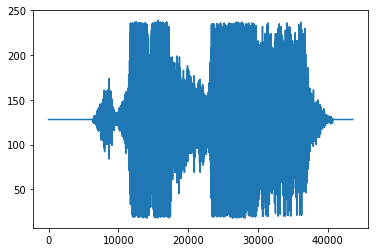

In [505]:
plt.plot(data);

In [130]:
from IPython.display import Audio

오디오를 재생해 봅시다.

In [234]:
Audio(data=data, rate=sample_rate)

빠르게 재생할 수 있습니다

In [506]:
Audio(data=data, rate=sample_rate*2)

numpy array의 짝수번째 값만 재생하면 2배로 빠르게 재생하는 것과 같은 효과가 납니다.

In [238]:
Audio(data=data[::2], rate=sample_rate)

앞의 일부분만 추출할 수 있습니다.

In [236]:
Audio(data=data[:len(data)//2], rate=sample_rate)

뒤의 일부분만 추출할 수 있습니다.

In [239]:
Audio(data=data[len(data)//2:], rate=sample_rate)